In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from helpers import *

import matplotlib.pyplot as plt
% matplotlib inline

In [125]:
test_df = pd.read_csv("~/real_estate/data/v11/test_df.csv")
train_df = pd.read_csv("~/real_estate/data/v11/train_df.csv")

features = list(train_df.columns[:-2])

train_df['zhvi_condo_ratio'] = (train_df['zhvi_condo_log'].values+.1)/(train_df['mean_county_zhvi_condo_log'].values+.1)
train_df['zhvi_condo_ratio_yr'] = (train_df['zhvi_condo_yr'].values+.1)/(train_df['mean_county_zhvi_condo_yr'].values+.1)
train_df['zhvi_condo_ratio_mo'] = (train_df['zhvi_condo_mo'].values+.1)/(train_df['mean_county_zhvi_condo_mo'].values+.1)

test_df['zhvi_condo_ratio'] = (test_df['zhvi_condo_log'].values+.1)/(test_df['mean_county_zhvi_condo_log'].values+.1)
test_df['zhvi_condo_ratio_yr'] = (test_df['zhvi_condo_yr'].values+.1)/(test_df['mean_county_zhvi_condo_yr'].values+.1)
test_df['zhvi_condo_ratio_mo'] = (test_df['zhvi_condo_mo'].values+.1)/(test_df['mean_county_zhvi_condo_mo'].values+.1)

features.append('zhvi_condo_ratio')
features.append('zhvi_condo_ratio_yr')
features.append('zhvi_condo_ratio_mo')

X_test = test_df[features].values
X_train = train_df[features].values

y_test = test_df["target"].values
y_train = train_df["target"].values

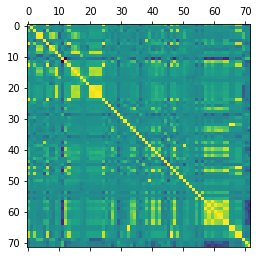

In [126]:
plt.matshow(train_df[features].corr())
plt.show()

In [132]:
train_df[features].corr()

,year,month,90_day_treasury_bill_rate,mean_adjusted_income_lag_log,mean_adjusted_income_with_dep_lag_log,mean_fixed_mortgage_rate,mean_hourly_earnings_adj,mean_mortgage_interest_hh_lag_log,mean_real_estate_taxes_hh_lag_log,median_sqft_value_log,...,median_county_sqft_value_mo,mean_county_sqft_value_yr,median_county_sqft_value_yr,mean_county_hourly_earnings_adj_mo,median_county_hourly_earnings_adj_mo,mean_county_hourly_earnings_adj_yr,median_county_hourly_earnings_adj_yr,zhvi_condo_ratio,zhvi_condo_ratio_yr,zhvi_condo_ratio_mo
year,1.000000,-0.087106,0.580065,0.091863,0.080334,-0.099840,0.978061,-0.248955,-0.024854,0.173998,...,0.056921,0.311811,0.294150,0.216937,0.216937,0.800886,0.800886,-0.084848,-0.278502,-0.158375
month,-0.087106,1.000000,0.111355,-0.009597,-0.008158,0.083924,0.110900,0.019627,0.001125,0.021250,...,0.002102,0.020443,0.018628,-0.122993,-0.122993,0.107597,0.107597,-0.009213,-0.018029,-0.011498
90_day_treasury_bill_rate,0.580065,0.111355,1.000000,0.056757,0.055444,-0.339350,0.642716,-0.129546,-0.005285,0.096823,...,0.037475,0.024334,0.016451,0.095159,0.095159,0.678945,0.678945,-0.042358,-0.052332,-0.044986
mean_adjusted_income_lag_log,0.091863,-0.009597,0.056757,1.000000,0.986600,-0.004152,0.089560,0.683094,0.819878,0.449483,...,-0.026142,-0.000889,-0.002647,0.018790,0.018790,0.071305,0.071305,0.389094,-0.019304,-0.011841
mean_adjusted_income_with_dep_lag_log,0.080334,-0.008158,0.055444,0.986600,1.000000,-0.009599,0.078886,0.645236,0.795629,0.436886,...,-0.032064,-0.012852,-0.015068,0.017268,0.017268,0.063294,0.063294,0.410450,-0.015838,-0.007996
mean_fixed_mortgage_rate,-0.099840,0.083924,-0.339350,-0.004152,-0.009599,1.000000,-0.109350,0.018257,-0.004447,0.002477,...,-0.045919,0.245628,0.250288,-0.142145,-0.142145,-0.134678,-0.134678,-0.005555,-0.109423,-0.023415
mean_hourly_earnings_adj,0.978061,0.110900,0.642716,0.089560,0.078886,-0.109350,1.000000,-0.242920,-0.023789,0.176545,...,0.051329,0.291799,0.273931,0.207154,0.207154,0.843447,0.843447,-0.085406,-0.265682,-0.150462
mean_mortgage_interest_hh_lag_log,-0.248955,0.019627,-0.129546,0.683094,0.645236,0.018257,-0.242920,1.000000,0.812803,0.379007,...,0.008550,-0.072911,-0.064429,-0.053633,-0.053633,-0.195757,-0.195757,0.233008,0.044739,-0.000760
mean_real_estate_taxes_hh_lag_log,-0.024854,0.001125,-0.005285,0.819878,0.795629,-0.004447,-0.023789,0.812803,1.000000,0.327397,...,-0.108811,-0.132192,-0.127423,-0.004533,-0.004533,-0.017562,-0.017562,0.285072,0.034393,0.048039
median_sqft_value_log,0.173998,0.021250,0.096823,0.449483,0.436886,0.002477,0.176545,0.379007,0.327397,1.000000,...,0.130269,0.191424,0.186376,0.032446,0.032446,0.143570,0.143570,-0.054741,-0.104106,-0.105205


### Train Linear Regressions

In [127]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_test_hat_1 = model_1.predict(X_test)
y_train_hat_1 = model_1.predict(X_train)
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat_1)[0,1]))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat_1)[0,1]))

R^2 train:  0.3835058158856604
R^2 test:  0.2822123753780585


### Plot Results

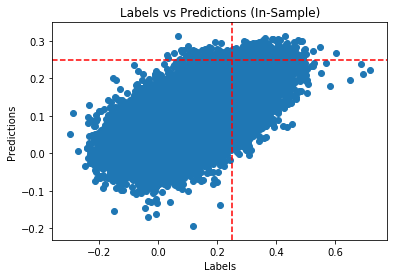

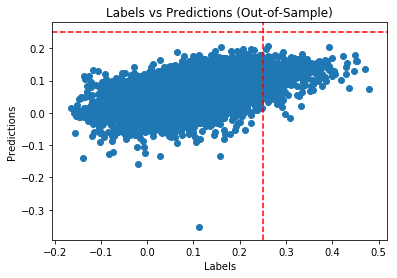

In [128]:
plt.scatter(y_train, y_train_hat_1)
plt.title("Labels vs Predictions (In-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat_1)
plt.title("Labels vs Predictions (Out-of-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

In [129]:
predictive_df = pd.DataFrame({"label": y_test, "pred": y_test_hat_1})
predictive_df = predictive_df.sort_values(by=["pred"], ascending=False)

predictive_df_25 = predictive_df.loc[predictive_df["pred"] >= .25]
top_10_predictions = predictive_df.head(n=10)
top_25_predictions = predictive_df.head(n=25)

mean_return_over_25 = np.mean(predictive_df_25["label"].values)
mean_return_top_10_predictions = np.mean(top_10_predictions["label"].values)
mean_return_top_25_predictions = np.mean(top_25_predictions["label"].values)

print("Mean return for predictions above 25%: ", mean_return_over_25)
print("Mean return for top 10 predictions: ", mean_return_top_10_predictions)
print("Mean return for top 25 predictions: ", mean_return_top_25_predictions)

Mean return for predictions above 25%:  nan
Mean return for top 10 predictions:  0.22561773197480614
Mean return for top 25 predictions:  0.23242469949878014


/home/gnazareths/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/gnazareths/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Get Coefficients

In [130]:
model = sm.OLS(y_train, X_train)
model = model.fit()

coefficients = model.params
standard_errors = model.HC0_se

regression_table = pd.DataFrame({"coefficients":coefficients, 
                                 "standard_errors":standard_errors,
                                 "t-statistics":coefficients/standard_errors}, index=features)

In [131]:
regression_table

,coefficients,standard_errors,t-statistics
year,-5.169471e-01,2.944329e-02,-17.557384
month,-9.364521e-02,5.336583e-03,-17.547784
90_day_treasury_bill_rate,2.001297e-02,2.458237e-03,8.141187
mean_adjusted_income_lag_log,1.600656e-01,1.163853e-02,13.753078
mean_adjusted_income_with_dep_lag_log,-2.010366e-01,1.113847e-02,-18.048851
mean_fixed_mortgage_rate,-2.473914e-02,2.279673e-03,-10.852056
mean_hourly_earnings_adj,1.200270e+10,1.638888e+10,0.732369
mean_mortgage_interest_hh_lag_log,6.691332e-02,3.404999e-03,19.651495
mean_real_estate_taxes_hh_lag_log,-6.307491e-02,4.244559e-03,-14.860181
median_sqft_value_log,5.603027e-02,6.974542e-03,8.033541
